## Work on the outliers as it is a regression Model

## Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')

## Exploratory Data Analysis

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Scatter Plots wrt index

In [6]:
columns = list(df.select_dtypes(exclude = 'object').columns)

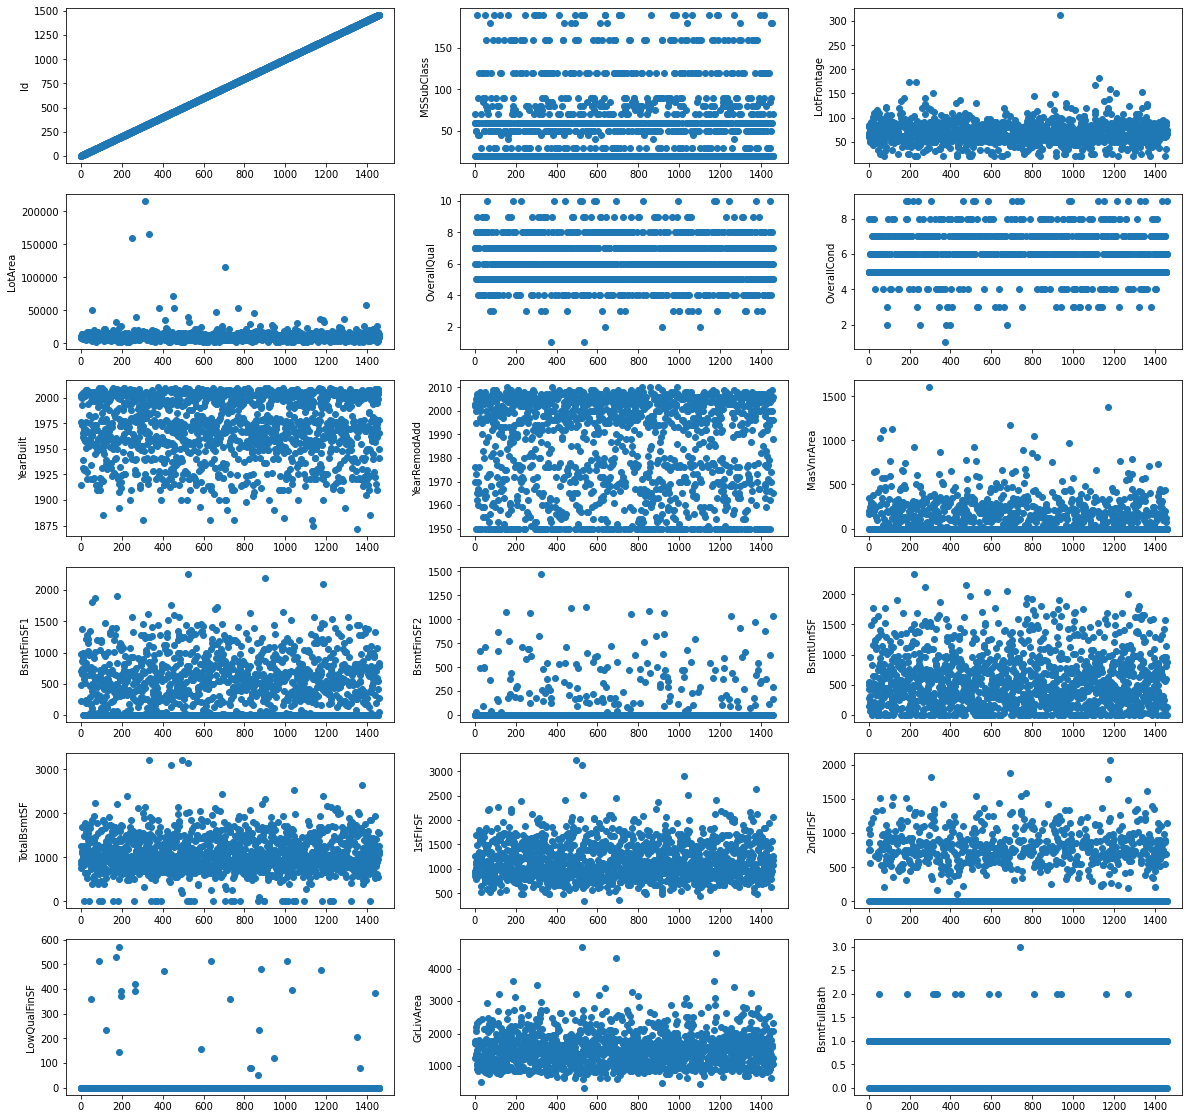

In [63]:
#### Visualizing numeric columns ######

numeric_cols = df.select_dtypes(include = np.number) ### selects numeric columns
#numeric_cols = numeric_cols.loc[numeric_cols['Balance Transfer']<=2500, :]

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 6
plot_cols = 3

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1

#### Do Preprocessing on Data -Treat the Outliers

In [9]:
df.shape

(1460, 81)

### Capping

In [10]:
df = df[df["TotalBsmtSF"]<5000]

In [11]:
df.shape

(1459, 81)

## Null Values Treatment

In [12]:
### Checking for entire null rows
df[df.isna().any(axis=1)].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Doesnt look like entire rows are null but it seems like many columns are with lots of Null values

## Columnwise Data Cleaning

In [13]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [14]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='LotFrontage'>

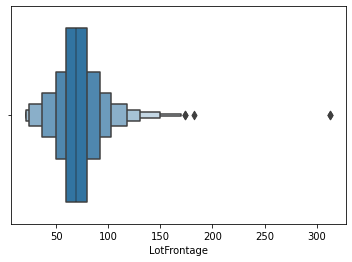

In [7]:
sns.boxenplot(df['LotFrontage'])

In [8]:
df['MasVnrType'].isna().sum()

8

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='MasVnrArea'>

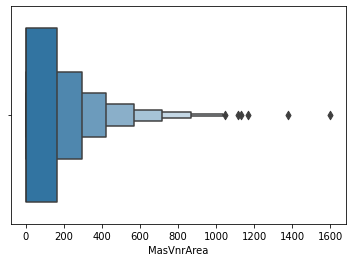

In [9]:
sns.boxenplot(df['MasVnrArea'])

In [10]:
df['PoolQC'].isna().sum()

1453

In [11]:
df['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [12]:
df[df['GarageYrBlt'] == np.nan]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [13]:
df['LotFrontage'].median()

69.0

#### Lets Do Columnwise Preprocessing

In [15]:
def preprocessing(df):
    #Id-Drop - Not related to Target
    df.drop('Id',axis=1,inplace=True)
    #MSSubClass, MSZoning - ok 
    #LotFrontage - Replace Nan with Median(Since Outliers are present)
    df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)
    #Alley - Replace Nan with Missing
    df['Alley'] = df['Alley'].replace(np.nan,'Missing')
    #MasVnrType - fill na with None
    df['MasVnrType'].fillna('None',inplace=True)
    #MasVnrArea - Replacing Nan with median - Outliers Present
    df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)
    #BsmtQual - Filling Nan with Missing
    df['BsmtQual'].fillna('Missing',inplace=True)
    #BsmtCond - Filling Nan with Missing
    df['BsmtCond'].fillna('Missing',inplace=True)
    #BsmtExposure
    df['BsmtExposure'].fillna('BsmtExposure',inplace=True)
    #BsmtFinType1
    df['BsmtFinType1'].fillna('BsmtFinType1',inplace=True)
    #BsmtFinType2
    df['BsmtFinType2'].fillna('BsmtFinType2',inplace=True)
    #Electrical - 1 Nan - will drop at the end
    #FireplaceQu - Filling Nan with Missing
    df['FireplaceQu'].fillna('Missing',inplace=True)
    #GarageType - Filling Nan with Missing
    df['GarageType'].fillna('Missing',inplace=True)
    #GarageYrBlt - Filling Nan with Median Year
    df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace=True)
    #GarageFinish - Filling Nan with Missing
    df['GarageFinish'].fillna('Missing',inplace=True)
    #GarageQual - Filling Nan with Missing
    df['GarageQual'].fillna('Missing',inplace=True)
    #GarageCond - Filling Nan with Missing
    df['GarageCond'].fillna('Missing',inplace=True)
    #PoolQC - Fill Nan with zero-0
    df['PoolQC'].fillna(0,inplace=True)
    #Fence - Filling Nan with Missing
    df['Fence'].fillna('Missing',inplace=True)
    #MiscFeature - Filling Nan with Missing
    df['MiscFeature'].fillna('Missing',inplace=True)

    
    
    

    
    
    
    
    # df.dropna(axis=0,inplace=True)

### Making Copy of Original Data

In [16]:
abt = df.copy()

In [17]:
abt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1200 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Calling the Preprocessing Function

In [18]:
preprocessing(abt)

In [19]:
abt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [20]:
## Dropping Nan in Electrical
abt.dropna(axis=0,inplace=True)

In [21]:
abt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1458 non-null   int64  
 1   MSZoning       1458 non-null   object 
 2   LotFrontage    1458 non-null   float64
 3   LotArea        1458 non-null   int64  
 4   Street         1458 non-null   object 
 5   Alley          1458 non-null   object 
 6   LotShape       1458 non-null   object 
 7   LandContour    1458 non-null   object 
 8   Utilities      1458 non-null   object 
 9   LotConfig      1458 non-null   object 
 10  LandSlope      1458 non-null   object 
 11  Neighborhood   1458 non-null   object 
 12  Condition1     1458 non-null   object 
 13  Condition2     1458 non-null   object 
 14  BldgType       1458 non-null   object 
 15  HouseStyle     1458 non-null   object 
 16  OverallQual    1458 non-null   int64  
 17  OverallCond    1458 non-null   int64  
 18  YearBuil

In [22]:
abt.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,Missing,Missing,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,...,0,0,Missing,Missing,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,Missing,Missing,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,...,0,0,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,...,0,0,Missing,Missing,0,12,2008,WD,Normal,250000


In [23]:
abt.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

## Data is Prepared

### Lets jump to Modelling

#### Feature and Target Selection

In [73]:
from sklearn.model_selection import train_test_split
X = abt.drop('SalePrice',axis=1)
X = pd.get_dummies(X)
y = abt['SalePrice']

## PCA

In [71]:
# from sklearn.decomposition import PCA

In [72]:
# # Statically Significant Variable
# pca = PCA(.98)
# x_pca = pca.fit_transform(X)
# print(X.shape)
# print(x_pca.shape)

(1458, 301)
(1458, 1)


In [47]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [48]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1458, dtype: int64

#### Splitting into Training and Validation Data

In [74]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [75]:
from sklearn.ensemble import RandomForestRegressor

#### Training the Model

In [76]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)


RandomForestRegressor()

#### Making Predictions

In [77]:
predict = rf.predict(x_test)

In [78]:
predict

array([ 84642.5 , 146301.75, 114080.08, 152822.  ,  91675.26,  86784.5 ,
       217994.74, 246241.68, 260410.94, 169706.18, 157770.  , 270878.73,
       189829.9 , 206165.92, 235088.24, 165410.  , 197174.9 , 122730.58,
       141958.45, 207518.48, 171551.53, 228450.25, 109081.26, 157433.1 ,
       197066.32, 168230.73, 187584.21, 107012.5 , 176797.32, 434300.6 ,
       122166.79, 261748.07, 283251.26, 114285.26, 133144.75, 190221.45,
       173114.41, 214810.47, 109760.04, 111579.01, 119892.26, 227487.  ,
        74720.  , 398413.44, 383186.  , 155940.15, 110255.75, 127500.  ,
       412577.53, 173284.06, 145924.1 , 251826.86, 122411.72, 166903.  ,
       159977.5 , 240185.41, 192983.  , 185997.87, 115118.  , 111714.  ,
        81262.26, 183307.57, 316136.72, 244215.4 , 249977.52, 212054.52,
       111223.54, 305470.07, 128417.  , 168725.21, 305182.24, 153211.64,
       114878.5 , 102645.58, 197685.56, 338473.01, 137410.9 , 135513.2 ,
       139487.5 , 124913.5 ,  99833.  ,  98065.5 , 

### Evaluation on Validation Data

In [79]:
from sklearn.metrics import mean_absolute_percentage_error

In [80]:
print(f'{mean_absolute_percentage_error(y_test,predict)*100} percent')

10.5397154206785 percent


#### The Mean Absolute Percentage Error from our Model is 10 percent approximately

##### Lets try to decrease the Mean Absolute Percentage Error to 5 percent maybe

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
cross_val_score(rf, X, y, cv=5, scoring=None)

array([0.86877808, 0.82680384, 0.86834109, 0.87976285, 0.86162098])

## GridSearchCV

In [36]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestRegressor(random_state=42)

parameter_list = {
    'max_depth' : [10,12,15,20,25,30,35,40,50],
    'min_samples_split' : [2,3,4,6,8,10,12,15,20,25,30,35,40],
    
}

cv_dtree = GridSearchCV(fit_dtree, cv=10, param_grid = parameter_list)

cv_dtree.fit(x_train, y_train)

print('Best Parameters using grid search: \n', cv_dtree.best_params_)

### Setting Best Parameters

In [58]:
rf.set_params( 
                     max_depth = 20, 
                     min_samples_split = 2)

RandomForestRegressor(max_depth=20)

### Work In Progress